# Understanding Kernels in Machine Learning

### Introduction

In machine learning, we generally wish to classify or cluster data points each of which is represented as a fixed-sized feature vector, typically of the form of $x_i \in \mathbb{R} ^N$. At this point, one might want to ask the following question:

**how do we present a text or a sequence which can be of variable length?**

1. define a generative model for the data and use the latent representation as features. Hence, one can utilize such features to learn a model to classify, cluster.

2. one might devise a way of measuring the similarity between objects that does not require feature generation as preprocessing step.

Let's learn little bit more about such similarity measures in 2. 

### Kernels

Suppose we are given emperical data 
$$ (x_1,y_1), \dots,(x_n,y_n) \in \mathcal{X} \times \mathcal{Y}$$.

Here, $x_i \in \mathcal{X} $ is called  a input/predictor variable while and $y_i \in \mathcal{Y}$ is called target/response variable.

In learning, we want to be able to $\textit{generalize}$ to unseen datapoints. In the case of binary classification, given some unseen input $x\in\mathcal{X}$, we would like to predict the correcsponding target $y \in \{ \pm 1 \}$. Loosely speaking, we would like to chose $y$ such that $(x,y)$ is some sense similar to the training examples. 

To this end, we need similarity measures in $\mathcal{X}$ and in $\{ \pm 1 \}$. For the former, we require a function

$$ k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$$

satisfying for all $ x,x^{'} \in \mathcal{X}$. Expectedly, such function is callled **kernel function**.



$$ k(x,x^{'}) = < \Phi(x), \Phi(x^{'}) >$$ where $\Phi$ maps into some dot product space $\mathcal{H}$, that is also called the $\textit{feature space}$. $k$ and $\Phi$ are called a kernel and its feature map. A kernel function corresponds to a dot product in a (usually
high-dimensional) feature space [1]. In this space, our estimation methods are linear, but as long as we can formulate everything in terms of kernel evaluations, we never explicitly have to compute in the high-dimensional feature
space [1].

### Some properties of a kernel function 

#### 1. Gram matrix
Given a kernel $k$ and inputs $x_1 , \dots , x_n \in \mathcal{X}$, the  $ n \times n $ matrix is called the Gram matrix

$$ K:= ( k (x_i,x_j))_{ij} $$



#### 2. Positive Definite Matrix.
A real $ n \times n $ symmetric matrix $K_{ij}$ satisfiying

$$ \Sigma_{i,j} c_i c_j K_{ij} \geq 0$$ for all $c_i \in \mathbb{R}$ is called positive definite.


For many others we refer [1,2].

### Lets see a kernel function in practive before advancing the theory

In [9]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [10]:
## Define a true function 
def f(x):
    return np.sin(x/10)+(x/50)**2

In [11]:
N = 100    # number of training points.
n = 30     # number of testing points.
s = 0.3    # noise variance.

In [12]:
X = np.arange(N).reshape(N,1)
y = f(X)+s*np.random.randn(N,1)

In [13]:
Xtest = np.linspace(0, N, 30).reshape(-1,1)
ytest=f(Xtest)+s*np.random.randn(30,1)

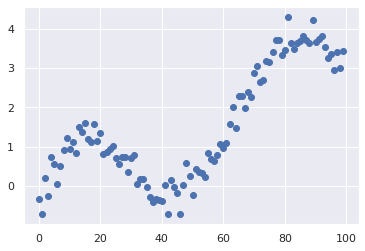

In [16]:
plt.scatter(X,y)

### Quantifing similarity

To quantify similarity between each datapoint, we use the squared exponential/Gaussian kernel. As we aim to use a function that quantifies the similarity between two points, we leverage desired properties of gaussian kernel, i.e., high value should be retured if two datapoints are very similary and low value if not similar,

### Explain starting from gaussian distribution to gaussian kernel etc.
## The Gaussian distribution

$$ \mathcal{N}(x|\mu,\,\sigma^{2}) =\frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$ where  
+ $\mu$ is expected value/mean
+ $\sigma$ is standard devation of mean
+ $\sigma^2$ is the variance.
+ The recoprocal of the variance as $\beta=\frac{1}{\sigma^2}$ is called the precision.

From the from above, we see that the Gaussian distribution satisfies

$$ \mathcal{N}(x|\mu,\sigma^2) > 0$$ which is also shown below

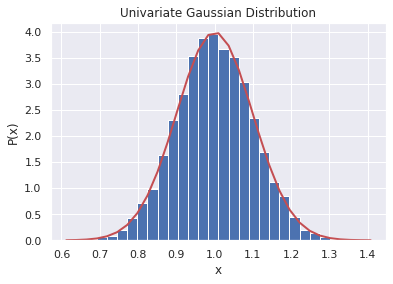

In [15]:
mu, sigma, N = 1, 0.1,10000 # mean and standard deviation
x = np.random.normal(mu, sigma, N)

np.all(x>0)## all simulated variables from given Gaussian greater than o.


gaussian=lambda x,mu,sigma: 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ) 
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins,gaussian(bins,mu,sigma),linewidth=2, color='r')

plt.title('Univariate Gaussian Distribution')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

### Kernels
The squared exponential kernel or Gaussian kernel is defined by

$$ k(x,x^{'}) =  exp\bigg( -\frac{1}{2}(x-x^{'})^T \Sigma^{-1} x-x^{'} \bigg) $$


if $\Sigma$ is diagonal, Gaussian kernel is reduced to



$$ k(x,x^{'}) =  \mathbf{e}^{-\frac{1}{2\sigma^2}(x-x^{'})^2}$$


$$ k(x,x^{'}) =  exp\bigg( -\frac{|| x-x^{'}||^2}{2\sigma^2} \bigg)   $$

Here $\sigma^2$ is known as the bindwidth

In [10]:
def gaussian_function(x):
    """
    1/(sigma*np.sqrt(2*np.pi)) is threated as constant
    as it is same for all x values
    first term is threated as constant as it is same for all x values
    """
    sigma=1
    mu=0
    second_term=np.exp(-0.5 * ( 1/np.power(sigma,2) ) * ( np.power(x-mu,2)))
    return second_term
#input_=np.linspace(-6, 6,1000)
#plt.plot(input_,gaussian_function(input_))    

In [352]:
predictions=[]
for point in Xtest:
    weights=[]
    for index in range(len(X)):
        w=gaussian_function(point-X[index])
        weights.append(w)

    weights=np.array(weights).reshape(1,len(weights))

    p=weights@y/weights.sum()
    predictions.append(p[0])
    

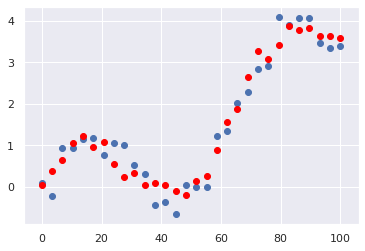

In [353]:
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,predictions,color='red')

# Faster implementation

In [325]:
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

In [354]:
gram_matrix=kernel(Xtest,X)

In [355]:
gram_matrix

array([[1.00000000e+00, 6.06530660e-01, 1.35335283e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.61810839e-03, 4.99352882e-02, 3.50374924e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.69840543e-11, 2.81797806e-08, 6.21770685e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.04694294e-04, 6.21770685e-06, 2.81797806e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.04407158e-01, 3.50374924e-01, 4.99352882e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.11089965e-02, 1.35335283e-01, 6.06530660e-01]])

In [356]:
predictions=[]
for index in range(len(Xtest)):
    p=gram_matrix[index]@y/gram_matrix[index].sum()
    predictions.append(p)

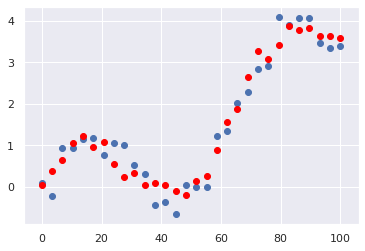

In [357]:
plt.scatter(Xtest,ytest)
plt.scatter(Xtest,predictions,color='red')

# References
[1]
@book{Scholkopf:2001:LKS:559923,
 author = {Scholkopf, Bernhard and Smola, Alexander J.},
 title = {Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond},
 year = {2001}
} 

[2]
@book{murphy2013machine,
  author = {Murphy, Kevin P.},
  description = {Machine Learning: A Probabilistic Perspective (Adaptive Computation and Machine Learning series): Kevin P. Murphy: 9780262018029: Amazon.com: Books},
  year = 2013
}

